In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#read results
df0 = pd.read_csv('EP_intensity_boxplot.csv', index_col=0)

In [306]:
df0.columns

Index(['OFCL', 'DSHP', 'HURR_STAT_TRANSFO', 'SHIP', 'HWRF', 'FSSE', 'GFSO',
       'Consensus_wo_HURR', 'Consensus_HURR_STAT_TRANSFO', 'TRUTH',
       'HURR_STAT_GRU', 'Consensus_HURR_STAT_GRU', 'HURR_STAT_COMP',
       'Consensus_HURR_STAT_COMP', 'HURR_STAT', 'Consensus_HURR_STAT',
       'HURR_GRU_ONLY', 'Consensus_HURR_GRU_ONLY', 'HURR_TRANSFO_ONLY',
       'Consensus_HURR_TRANSFO_ONLY'],
      dtype='object')

In [241]:
def get_mae(df, truth):
    for col in df.columns:
        df[col] = abs(df[col] - truth)
    return df 

In [211]:
def show_boxplot(df, truth, colors): 
    for col in df.columns:
#         df[col] = np.log(abs(df[col] - truth)) 
        df[col] = abs(df[col] - truth)
    sns.set_style("whitegrid") 
    ax = sns.boxplot(data=df, showfliers=False, whisklty = 0, palette = colors)
#     ax = sns.violinplot(data=df, showfliers=False, showmeans=True, palette = colors)
#     ax = sns.barplot(data = df, estimator=mean, palette = colors)
#     ax = sns.stripplot(data=df,palette = colors)

    plt.setp(ax.get_xticklabels(), rotation=30)
    ax.set(ylabel='Mean Absolute Error')
    
    print(df.describe())
    return 

In [302]:
def show_lineplot(df, ci, colors): 
    ax = sns.pointplot(data=df, ci=ci, join = False, palette = colors, markers="s", capsize=0.1, scale=1.2)
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set(ylabel='Mean Absolute Error')
    return 

<ipython-input-241-0d2c39c6f45e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = abs(df[col] - truth)


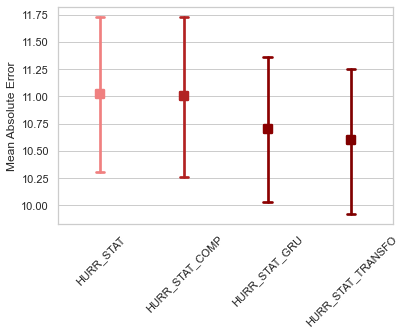

In [303]:
# subset to columns: conclusion 1 
set1 = ['HURR_STAT','HURR_STAT_COMP','HURR_STAT_GRU','HURR_STAT_TRANSFO'] #'HURR_TRANSFO_ONLY', 
colors =['lightcoral','firebrick','darkred','maroon']
df = get_mae(df0[set1], df0['TRUTH'])
show_lineplot(df, ci=95, colors=colors)
# show_boxplot(df[set1],df0['TRUTH'], colors)

<ipython-input-241-0d2c39c6f45e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = abs(df[col] - truth)


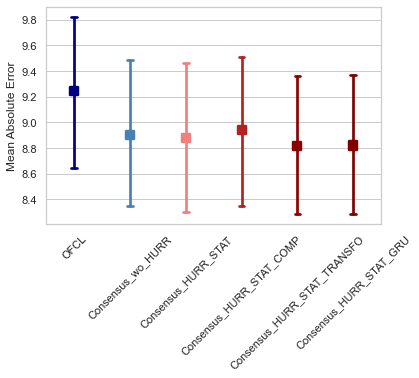

In [304]:
#conclusion 2: 
set2 = ['OFCL','Consensus_wo_HURR','Consensus_HURR_STAT','Consensus_HURR_STAT_COMP','Consensus_HURR_STAT_TRANSFO',
        'Consensus_HURR_STAT_GRU']

colors =['navy','steelblue','lightcoral','firebrick','darkred','maroon']
# show_boxplot(df[set2],df0['TRUTH'], colors) 
df = get_mae(df0[set2], df0['TRUTH'])
show_lineplot(df, ci=95, colors=colors)


<ipython-input-241-0d2c39c6f45e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = abs(df[col] - truth)


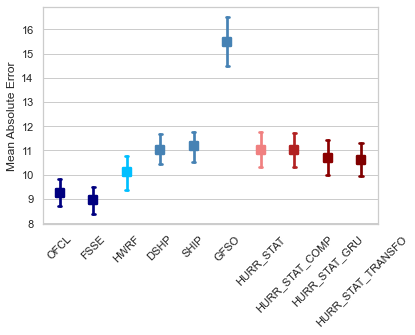

In [305]:
#conclusion 3: 
set3= ['OFCL','FSSE','HWRF','DSHP','SHIP','GFSO',
       'HURR_STAT','HURR_STAT_COMP','HURR_STAT_GRU','HURR_STAT_TRANSFO']
colors =['navy','navy','deepskyblue','steelblue','steelblue', 'steelblue',
         'lightcoral','firebrick','darkred','maroon']

df = get_mae(df0[set3], df0['TRUTH'])
show_lineplot(df, ci=95, colors=colors)